In [1]:
import mpmath as mp
q, f = 0.2, 2.0

# f1(x, y) = 0, f2(x, y) = 0 を解きたい
def f1(x, y):
    return q*y - x*y + x*(1 - x)
def f2(x, y):
    return -q*y - x*y + f
# 初期値 (x0, y0) = (0.2, 1.0) からニュートン法で解く
x_star, y_star = mp.findroot((f1, f2), (0.5, 0.5))

print("平衡点: x* =", x_star, ", y* =", y_star)

ModuleNotFoundError: No module named 'mpmath'

In [14]:
def euler_oregonator(f, x0, y0, t):
    X = np.empty_like(t); Y = np.empty_like(t)
    X[0], Y[0] = x0, y0
    h = t[1] - t[0]
    for k in range(len(t) - 1):
        dx, dy = f(X[k], Y[k])   # 現在値で傾きを評価
        X[k+1] = X[k] + h * dx   # x を更新
        Y[k+1] = Y[k] + h * dy   # y を更新
    return X, Y


In [ ]:
t = np.linspace(0, 200, 10000)  # h が小さめになるように刻みをとる
x0, y0 = 0.2, 1.2
X, Y = euler_oregonator(oregonator_rhs, x0, y0, t)

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Hiragino Sans'

q = 0.2
f = 0.7
# q = 0.02
# f = 2.0

def oregonator_rhs(x, y):
    dx = q*y - x*y + x*(1-x)
    dy = -q*y - x*y + f
    return dx, dy


In [76]:
def euler_oregonator(f, x0, y0, t):
    X = np.empty_like(t); Y = np.empty_like(t)
    X[0], Y[0] = x0, y0
    h = t[1] - t[0]

    for k in range(len(t) - 1):
        dx, dy = f(X[k], Y[k])   # 現在値で傾きを評価
        X[k+1] = X[k] + h * dx   # x を更新
        Y[k+1] = Y[k] + h * dy   # y を更新

    return X, Y

In [77]:
t = np.linspace(0, 2000, 100000)  # h が小さめになるように刻みをとる
x0, y0 = 0.02, 2.2
X, Y = euler_oregonator(oregonator_rhs, x0, y0, t)

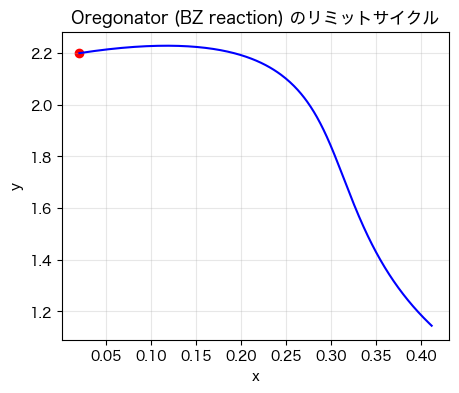

In [78]:
plt.figure(figsize=(5,4))
plt.plot(X, Y, 'b-')
# plt.scatter(X, Y, c='b')
plt.scatter(x0, y0, c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Oregonator (BZ reaction) のリミットサイクル")
plt.grid(True, alpha=0.3)
plt.show()

# KTモデル

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Hiragino Sans'

vareps = 0.01
q = 0.002
f = 4.7

def kt_rhs(x, z):
    dx = (f*z*(q-x)*(q+x) + x*(1-x))/vareps
    dz = x - z
    return dx, dz

def euler_kt(f, x0, z0, t):
    X = np.empty_like(t); Z = np.empty_like(t)
    X[0], Z[0] = x0, z0
    h = t[1] - t[0]

    for k in range(len(t) - 1):
        dx, dz = f(X[k], Z[k])   # 現在値で傾きを評価
        X[k+1] = X[k] + h * dx   # x を更新
        Z[k+1] = Z[k] + h * dz   # z を更新

    return X, Z


/var/folders/vw/57hl1g410sqfdkr_3dp48kgm0000gn/T/ipykernel_31724/194467537.py:11: RuntimeWarning: overflow encountered in scalar multiply
  dx = (f*z*(q-x)*(q+x) + x*(1-x))/vareps
/var/folders/vw/57hl1g410sqfdkr_3dp48kgm0000gn/T/ipykernel_31724/194467537.py:11: RuntimeWarning: invalid value encountered in scalar add
  dx = (f*z*(q-x)*(q+x) + x*(1-x))/vareps


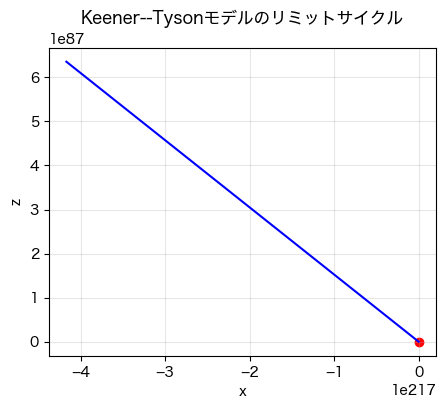

In [134]:
t = np.linspace(0, 200, 1000000)  # h が小さめになるように刻みをとる
x0, z0 = 4.2, 10.2
X, Z = euler_kt(kt_rhs, x0, z0, t)

plt.figure(figsize=(5,4))
plt.plot(X, Z, 'b-')
plt.scatter(x0, z0, c='r')
plt.xlabel("x")
plt.ylabel("z")
plt.title("Keener--Tysonモデルのリミットサイクル")
plt.grid(True, alpha=0.3)
plt.show()


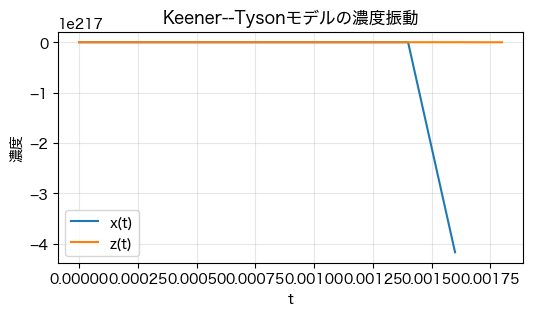

In [135]:
plt.figure(figsize=(6,3))
plt.plot(t, X, label="x(t)")
plt.plot(t, Z, label="z(t)")
plt.xlabel("t"); plt.ylabel("濃度")
plt.legend(); plt.grid(True, alpha=0.3)
plt.title("Keener--Tysonモデルの濃度振動")
plt.show()